In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, log_loss

import sklearn.metrics
%matplotlib inline

In [165]:
df = pd.read_csv('grad.csv')
df.head(5)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [166]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [167]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
rank,400.0,2.4850,0.944460,1.00,2.00,2.000,3.00,4.0


In [168]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [169]:
ct = pd.crosstab(index=df.admit, columns=[df['rank']])
ct

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


In [170]:
admitpct = np.array([])
for x in range(4):
    admitpct = np.append( admitpct, (ct.iloc[1,x]) / (ct.iloc[0,x] + ct.iloc[1,x]) )

admitpctdf = pd.DataFrame(admitpct)
admitpctdf.index = admitpctdf.index + 1
admitpctdf.columns = ['Admit %']

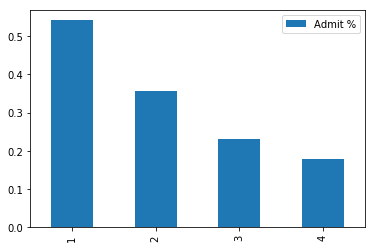

In [171]:
admitpctdf.plot.bar(stacked=False)

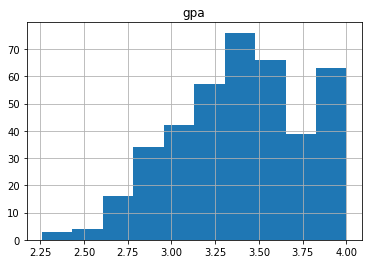

In [172]:
histgpa = df.hist('gpa')

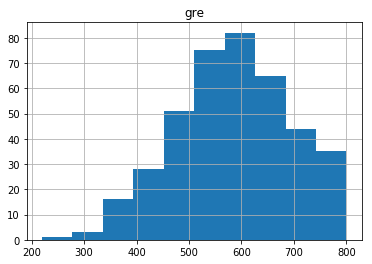

In [173]:
histgre = df.hist('gre')

In [174]:
#plt.scatter(df['admit'], df['rank'])
df.corr()

,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


In [175]:
# Linear Regression
# x = predictors
# y = admit
y=df.admit.values
X = df[['gre','gpa','rank']].values
X.shape, y.shape

((400, 3), (400,))

In [176]:
scalar = StandardScaler().fit(X)
X = scalar.transform(X)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [178]:
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
model = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

In [179]:
model.intercept_, model.coef_

(array([-0.86117019]), array([[ 0.18010275,  0.32631312, -0.48365958]]))

In [180]:
y_hat = model.predict(X_test)
y_test, y_hat

(array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64))

In [181]:
np.sum(y_test == y_hat) , np.sum(~(y_test == y_hat))

(86, 34)

In [182]:
81/120

0.675

In [183]:
p_hat = model.predict_proba(X_test)[:,1]
log_loss(y_test, p_hat)

0.5701899979245797

In [184]:
pred_neg = (y_test == y_hat)[p_hat < 0.5]
pred_pos = (y_test == y_hat)[p_hat > 0.5]

In [185]:
TN, FN = pred_neg.sum(), (~pred_neg).sum()
TP, FP = pred_pos.sum(), (~pred_pos).sum()
TN, FN, TP, FP

(78, 31, 8, 3)

In [186]:
cm = confusion_matrix(y_test, y_hat)
cm

array([[78,  3],
       [31,  8]], dtype=int64)

In [187]:
accuracy = (TN + TP) / (TN + TP + FN + FP)
accuracy

0.7166666666666667

In [188]:
auc = roc_auc_score(y_test, p_hat)
auc

0.7008547008547009

In [189]:
accuracy_score(y_test, y_hat)

0.7166666666666667

In [190]:
precision_score(y_test, y_hat)

0.7272727272727273

In [191]:
recall_score(y_test, y_hat)

0.20512820512820512

In [192]:
cmdf = pd.DataFrame(cm, index=['Predict Rejection','Predict Admission'], columns=['Actual Rejection', 'Actual Admission'])
cmdf

,Actual Rejection,Actual Admission
Predict Rejection,78,3
Predict Admission,31,8


In [193]:
# at what weight is the probability 0.5
# midpoint = -B0 + ln(p/1-p) / B1
midpoint = ((- model.intercept_[0]) + 0 ) / model.coef_[0][0] 
midpoint

4.781549365416183

In [194]:
X_test.shape, y_test.shape

((120, 3), (120,))

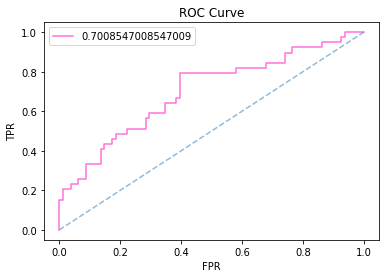

In [195]:
fpr, tpr, thr = roc_curve(y_test, p_hat)
plt.plot(fpr, tpr, label=auc, color='#ff33cc', alpha=0.7)
plt.plot(np.linspace(0,1), np.linspace(0,1), linestyle='--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [196]:
searchCV = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=10
        ,random_state=777
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='lbfgs'
        ,tol=10
    )
modelcv = searchCV.fit(X_train, y_train)

In [199]:
y_hatcv = modelcv.predict(X_test)
np.sum(y_test == y_hatcv) , np.sum(~(y_test == y_hatcv))

(81, 39)

In [200]:
df[['is_rank1', 'is_rank2', 'is_rank3', 'is_rank4']] = pd.get_dummies(df['rank']).iloc[:, ]
df.head(3)

,admit,gre,gpa,rank,is_rank1,is_rank2,is_rank3,is_rank4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0


In [201]:
newy = df.admit
newX = df[['gre', 'gpa', 'is_rank1', 'is_rank2', 'is_rank3', 'is_rank4']]

In [202]:
newX_train, newX_test, newy_train, newy_test = train_test_split(newX, newy, test_size=0.30, random_state=40)

In [203]:
scalar = StandardScaler().fit(newX_train)
nX_train = scalar.transform(newX_train)
nX_test = scalar.transform(newX_test)

C:\McKProgramFiles\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\McKProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
C:\McKProgramFiles\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [204]:
newmodel = LogisticRegression(solver='lbfgs').fit(nX_train, newy_train)

In [205]:
newmodel.intercept_, newmodel.coef_

(array([-0.95928775]),
 array([[ 0.19809277,  0.35368279,  0.24500086,  0.17445065, -0.04572062,
         -0.4056767 ]]))

In [207]:
yhat = newmodel.predict(nX_test)

In [208]:
accuracy_score(newy_test, yhat)

0.65

In [209]:
df0 = df['admit']==0
df1 = df['admit'] ==1
X0_train, X0_test, y0_train, y0_test = train_test_split(newX, newy, test_size=0.30, random_state=40)